<a href="https://colab.research.google.com/github/Danielrcnn/Redes-Neurais/blob/master/Trabalho_2_Classifica%C3%A7%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Para executar: ## 
  # Primeramente, deve-se pegar o seu Token (kaggle.json):
    # Logado em seu perfil do Kaggle, vá em "Account" e procure por API, após achar, clique em "Create Nem API Token";
    # Após baixar seu Token, upe ele aqui.
  # Pronto, só executar a rede.

In [1]:
import os #Import do Drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import random
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
  
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d moltean/fruits

 98% 742M/760M [00:07<00:00, 86.3MB/s]
100% 760M/760M [00:07<00:00, 101MB/s] 


In [3]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization ca be applied by setting 'normalize = True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.figure(figsize = (12, 8))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha = 'center', va = 'center',
                     color = 'white' if (cm[i, j] > thresh) else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.yticks(tick_marks, classes)
    plt.show()

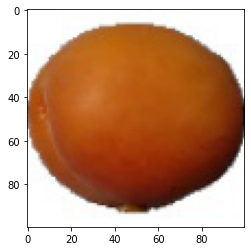

In [5]:
plt.imshow(image.load_img('/content/fruits-360/Training/Apricot/r_139_100.jpg'))

In [6]:
Trainpath = '/content/fruits-360/Training'
Testpath = '/content/fruits-360/Test'

In [7]:
Labels = os.listdir(Testpath)

In [ ]:
Labels

In [8]:
traindata = pd.DataFrame(columns=['img_path','class'])
test_df = pd.DataFrame(columns=['img_path','class'])

In [9]:
Train_images = []
Train_labels = []
shape = (100,100)

for className in os.listdir(Trainpath):
  for filename in os.listdir(Trainpath+"/"+className):
    img = cv.imread(os.path.join(Trainpath+"/"+className, filename))
    Train_labels.append(className)
    img = cv.resize(img, shape)
    Train_images.append(img)
Train_labels = pd.get_dummies(Train_labels).values
Train_images = np.array(Train_images)

In [ ]:
Train_images

In [10]:
sample_images = []
sample_labels = []
shape = (100,100)

for className in os.listdir(Testpath):
  for filename in os.listdir(Testpath+"/"+className):
    img = cv.imread(os.path.join(Testpath+"/"+className, filename))
    sample_labels.append(className)
    img = cv.resize(img, shape)
    sample_images.append(img)
sample_labels = pd.get_dummies(sample_labels).values
sample_images = np.array(sample_images)
rounded_labels=np.argmax(sample_labels, axis=1)
rounded_labels

array([ 6,  6,  6, ..., 15, 15, 15])

In [ ]:
# i_train=random.randint(0,len(Train_labels))
# print(Train_labels[i_train])
# plt.imshow(cv.cvtColor(Train_images[i_train], cv.COLOR_BGR2RGB))
# len(Train_labels)

In [11]:
model = Sequential()
model.add(Conv2D(16,  (3,3), padding = 'same', activation = 'relu', input_shape=(100,100,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,  (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(524, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(262, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(131, activation = 'softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [12]:
Treinamento_da_Rede = model.fit(Train_images,Train_labels, validation_data=(sample_images, sample_labels), shuffle=True, epochs=10, verbose=1)

Epoch 1/10
2116/2116 [==============================] - 54s 10ms/step - loss: 1.4625 - accuracy: 0.6731 - val_loss: 0.2933 - val_accuracy: 0.9189
Epoch 2/10
2116/2116 [==============================] - 20s 10ms/step - loss: 0.0645 - accuracy: 0.9842 - val_loss: 0.3415 - val_accuracy: 0.9174
Epoch 3/10
2116/2116 [==============================] - 20s 10ms/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.2020 - val_accuracy: 0.9516
Epoch 4/10
2116/2116 [==============================] - 20s 10ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.3038 - val_accuracy: 0.9249
Epoch 5/10
2116/2116 [==============================] - 20s 10ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.2719 - val_accuracy: 0.9561
Epoch 6/10
2116/2116 [==============================] - 20s 10ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.5095 - val_accuracy: 0.8977
Epoch 7/10
2116/2116 [==============================] - 20s 10ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.1505 -

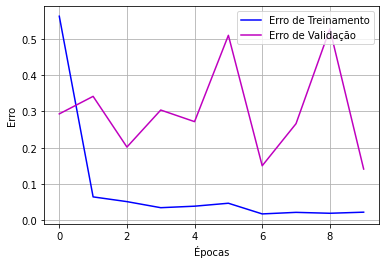

In [13]:
plt.plot(Treinamento_da_Rede.history['loss'], "-b", label="Erro de Treinamento")
plt.plot(Treinamento_da_Rede.history['val_loss'], "-m", label="Erro de Validação")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.show()

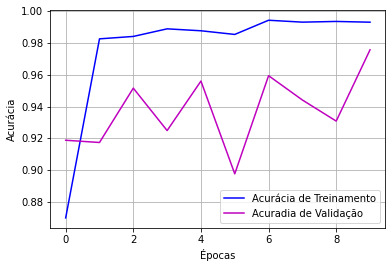

In [14]:
plt.plot(Treinamento_da_Rede.history['accuracy'], "-b", label="Acurácia de Treinamento")
plt.plot(Treinamento_da_Rede.history['val_accuracy'], "-m", label="Acuradia de Validação")
plt.grid()
plt.legend(loc="lower right")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(sample_images, sample_labels, verbose=2)
print('\nTest accuracy:', test_acc)

709/709 - 2s - loss: 0.1415 - accuracy: 0.9757

Test accuracy: 0.9757140278816223


Confusion matrix, without normalization


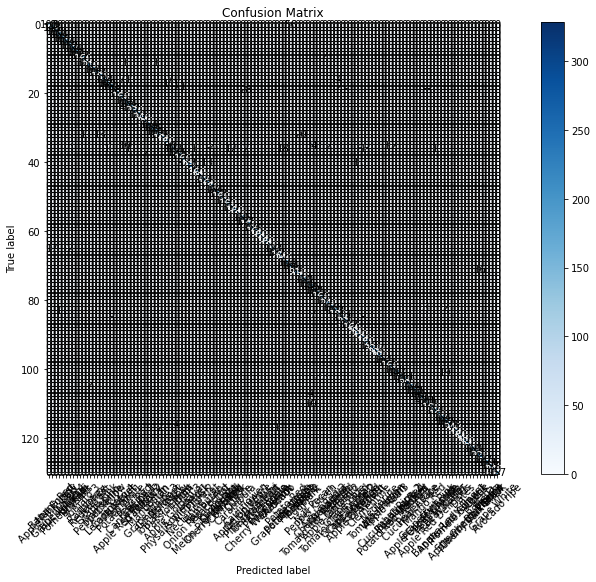

In [16]:
ypred = model.predict(sample_images).argmax(axis = 1)
cm = confusion_matrix(rounded_labels, ypred)
plot_confusion_matrix(cm, os.listdir(Testpath))

In [23]:
# Visualização melhor da Matriz de Confusão

print(cm[110]) #Indice da Matriz
Labels[110] #Indice correspondente 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]


'Grapefruit Pink'